In [96]:
import numpy as np 
import random
import matplotlib.pyplot as plt 


NameError: name 'numIterations' is not defined

In [108]:
def gradientDescent(X, Y, alpha, numIterations):

    ''' x : M*N sized ndarray 
        y : Array of length m, contains target values
        alpha : learning rate ( the coefficient applied to the gradient )
        numIterations : Max no. of iterations of correcting the coefficients ''' 
    
    m = len(X)
    X1 = np.ones(shape=(len(X),2))
    theta = np.random.rand(2)
    cost = np.zeros(numIterations + 1)
    X1[:,1] = X
    xTrans = X1.T
    x_range = (min(X1[:,1]),max(X1[:,1]))
    x_axis = np.linspace(x_range[0],x_range[1], num = 20)
    
    
    
    print(xTrans.shape)
    for i in range(numIterations):
         
        hypothesis = np.dot(X1,theta)
        loss = hypothesis - Y
        mse_cost = np.sum(np.square(loss))/(m)
        cost[i] = mse_cost
        print("Iteration %d | Cost: %f" % (i, mse_cost))
        gradient = - 2*np.dot(xTrans,loss)/m
        theta = theta + alpha*gradient
        #plot_lines(theta,X1,Y,cost)
        #if i > 2 and cost[i-1] - cost[i] < 0.000000005:
        #    print(theta)
        #   break 
    plt.plot(cost)
    print(theta, mse_cost)    
 

In [109]:
def plot_lines(coeffs,X1,Y,cost):
    x_range = (min(X1[:,1]),max(X1[:,1]))
    x_axis = np.linspace(x_range[0],x_range[1], num = 20)
    y = coeffs[0] + coeffs[1]*x_axis
    plt.scatter(X1[:,1],Y)
    plt.plot(x_axis,y,color='r',linewidth = 0.5)
    #plt.plot(cost)
    plt.show()

In [110]:
data = np.genfromtxt('data/insurance_data.csv',delimiter=',')
X = data[:,0] 
Y = data[:,1]
print(Y)

[392.5  46.2  15.7 422.2 119.4 170.9  56.9  77.5 214.   65.3  20.9 248.1
  23.5  39.6  48.8   6.6 134.9  50.9   4.4 113.   14.8  48.7  52.1  13.2
 103.9  77.5  11.8  98.1  27.9  38.1   0.   69.2  14.6  40.3 161.5  57.2
 217.6  58.1  12.6  59.6  89.9 202.4 181.3 152.8 162.8  73.4  21.3  92.6
  76.1  39.9 142.1  93.   31.9  32.1  55.6 133.3 194.5 137.9  87.4 209.8
  95.5 244.6 187.5]


(2, 63)
Iteration 0 | Cost: 16345.557314
Iteration 1 | Cost: 15718.901047
Iteration 2 | Cost: 15118.576884
Iteration 3 | Cost: 14543.478346
Iteration 4 | Cost: 13992.545443
Iteration 5 | Cost: 13464.762729
Iteration 6 | Cost: 12959.157429
Iteration 7 | Cost: 12474.797641
Iteration 8 | Cost: 12010.790623
Iteration 9 | Cost: 11566.281146
Iteration 10 | Cost: 11140.449919
Iteration 11 | Cost: 10732.512076
Iteration 12 | Cost: 10341.715734
Iteration 13 | Cost: 9967.340602
Iteration 14 | Cost: 9608.696655
Iteration 15 | Cost: 9265.122867
Iteration 16 | Cost: 8935.985984
Iteration 17 | Cost: 8620.679365
Iteration 18 | Cost: 8318.621858
Iteration 19 | Cost: 8029.256731
Iteration 20 | Cost: 7752.050648
Iteration 21 | Cost: 7486.492683
Iteration 22 | Cost: 7232.093378
Iteration 23 | Cost: 6988.383844
Iteration 24 | Cost: 6754.914894
Iteration 25 | Cost: 6531.256216
Iteration 26 | Cost: 6316.995579
Iteration 27 | Cost: 6111.738076
Iteration 28 | Cost: 5915.105393
Iteration 29 | Cost: 5726.735112

Iteration 1183 | Cost: 1428.156971
Iteration 1184 | Cost: 1428.153384
Iteration 1185 | Cost: 1428.149797
Iteration 1186 | Cost: 1428.146210
Iteration 1187 | Cost: 1428.142624
Iteration 1188 | Cost: 1428.139037
Iteration 1189 | Cost: 1428.135451
Iteration 1190 | Cost: 1428.131864
Iteration 1191 | Cost: 1428.128278
Iteration 1192 | Cost: 1428.124692
Iteration 1193 | Cost: 1428.121106
Iteration 1194 | Cost: 1428.117519
Iteration 1195 | Cost: 1428.113933
Iteration 1196 | Cost: 1428.110347
Iteration 1197 | Cost: 1428.106762
Iteration 1198 | Cost: 1428.103176
Iteration 1199 | Cost: 1428.099590
Iteration 1200 | Cost: 1428.096004
Iteration 1201 | Cost: 1428.092419
Iteration 1202 | Cost: 1428.088833
Iteration 1203 | Cost: 1428.085248
Iteration 1204 | Cost: 1428.081662
Iteration 1205 | Cost: 1428.078077
Iteration 1206 | Cost: 1428.074492
Iteration 1207 | Cost: 1428.070907
Iteration 1208 | Cost: 1428.067322
Iteration 1209 | Cost: 1428.063737
Iteration 1210 | Cost: 1428.060152
Iteration 1211 | Cos

Iteration 2448 | Cost: 1423.677114
Iteration 2449 | Cost: 1423.673618
Iteration 2450 | Cost: 1423.670122
Iteration 2451 | Cost: 1423.666626
Iteration 2452 | Cost: 1423.663130
Iteration 2453 | Cost: 1423.659634
Iteration 2454 | Cost: 1423.656138
Iteration 2455 | Cost: 1423.652642
Iteration 2456 | Cost: 1423.649146
Iteration 2457 | Cost: 1423.645651
Iteration 2458 | Cost: 1423.642155
Iteration 2459 | Cost: 1423.638659
Iteration 2460 | Cost: 1423.635164
Iteration 2461 | Cost: 1423.631668
Iteration 2462 | Cost: 1423.628173
Iteration 2463 | Cost: 1423.624678
Iteration 2464 | Cost: 1423.621183
Iteration 2465 | Cost: 1423.617688
Iteration 2466 | Cost: 1423.614192
Iteration 2467 | Cost: 1423.610697
Iteration 2468 | Cost: 1423.607203
Iteration 2469 | Cost: 1423.603708
Iteration 2470 | Cost: 1423.600213
Iteration 2471 | Cost: 1423.596718
Iteration 2472 | Cost: 1423.593224
Iteration 2473 | Cost: 1423.589729
Iteration 2474 | Cost: 1423.586235
Iteration 2475 | Cost: 1423.582740
Iteration 2476 | Cos

Iteration 3947 | Cost: 1418.514786
Iteration 3948 | Cost: 1418.511394
Iteration 3949 | Cost: 1418.508003
Iteration 3950 | Cost: 1418.504611
Iteration 3951 | Cost: 1418.501219
Iteration 3952 | Cost: 1418.497828
Iteration 3953 | Cost: 1418.494436
Iteration 3954 | Cost: 1418.491045
Iteration 3955 | Cost: 1418.487653
Iteration 3956 | Cost: 1418.484262
Iteration 3957 | Cost: 1418.480871
Iteration 3958 | Cost: 1418.477479
Iteration 3959 | Cost: 1418.474088
Iteration 3960 | Cost: 1418.470697
Iteration 3961 | Cost: 1418.467306
Iteration 3962 | Cost: 1418.463915
Iteration 3963 | Cost: 1418.460524
Iteration 3964 | Cost: 1418.457133
Iteration 3965 | Cost: 1418.453743
Iteration 3966 | Cost: 1418.450352
Iteration 3967 | Cost: 1418.446962
Iteration 3968 | Cost: 1418.443571
Iteration 3969 | Cost: 1418.440181
Iteration 3970 | Cost: 1418.436790
Iteration 3971 | Cost: 1418.433400
Iteration 3972 | Cost: 1418.430010
Iteration 3973 | Cost: 1418.426619
Iteration 3974 | Cost: 1418.423229
Iteration 3975 | Cos

Iteration 5360 | Cost: 1413.789804
Iteration 5361 | Cost: 1413.786508
Iteration 5362 | Cost: 1413.783212
Iteration 5363 | Cost: 1413.779915
Iteration 5364 | Cost: 1413.776619
Iteration 5365 | Cost: 1413.773323
Iteration 5366 | Cost: 1413.770027
Iteration 5367 | Cost: 1413.766731
Iteration 5368 | Cost: 1413.763435
Iteration 5369 | Cost: 1413.760139
Iteration 5370 | Cost: 1413.756844
Iteration 5371 | Cost: 1413.753548
Iteration 5372 | Cost: 1413.750252
Iteration 5373 | Cost: 1413.746957
Iteration 5374 | Cost: 1413.743661
Iteration 5375 | Cost: 1413.740366
Iteration 5376 | Cost: 1413.737070
Iteration 5377 | Cost: 1413.733775
Iteration 5378 | Cost: 1413.730480
Iteration 5379 | Cost: 1413.727185
Iteration 5380 | Cost: 1413.723890
Iteration 5381 | Cost: 1413.720595
Iteration 5382 | Cost: 1413.717300
Iteration 5383 | Cost: 1413.714005
Iteration 5384 | Cost: 1413.710710
Iteration 5385 | Cost: 1413.707415
Iteration 5386 | Cost: 1413.704120
Iteration 5387 | Cost: 1413.700826
Iteration 5388 | Cos

Iteration 6749 | Cost: 1409.274796
Iteration 6750 | Cost: 1409.271591
Iteration 6751 | Cost: 1409.268386
Iteration 6752 | Cost: 1409.265181
Iteration 6753 | Cost: 1409.261976
Iteration 6754 | Cost: 1409.258771
Iteration 6755 | Cost: 1409.255566
Iteration 6756 | Cost: 1409.252362
Iteration 6757 | Cost: 1409.249157
Iteration 6758 | Cost: 1409.245953
Iteration 6759 | Cost: 1409.242748
Iteration 6760 | Cost: 1409.239544
Iteration 6761 | Cost: 1409.236339
Iteration 6762 | Cost: 1409.233135
Iteration 6763 | Cost: 1409.229931
Iteration 6764 | Cost: 1409.226726
Iteration 6765 | Cost: 1409.223522
Iteration 6766 | Cost: 1409.220318
Iteration 6767 | Cost: 1409.217114
Iteration 6768 | Cost: 1409.213910
Iteration 6769 | Cost: 1409.210707
Iteration 6770 | Cost: 1409.207503
Iteration 6771 | Cost: 1409.204299
Iteration 6772 | Cost: 1409.201095
Iteration 6773 | Cost: 1409.197892
Iteration 6774 | Cost: 1409.194688
Iteration 6775 | Cost: 1409.191485
Iteration 6776 | Cost: 1409.188281
Iteration 6777 | Cos

Iteration 8152 | Cost: 1404.841191
Iteration 8153 | Cost: 1404.838076
Iteration 8154 | Cost: 1404.834960
Iteration 8155 | Cost: 1404.831845
Iteration 8156 | Cost: 1404.828730
Iteration 8157 | Cost: 1404.825615
Iteration 8158 | Cost: 1404.822499
Iteration 8159 | Cost: 1404.819384
Iteration 8160 | Cost: 1404.816269
Iteration 8161 | Cost: 1404.813154
Iteration 8162 | Cost: 1404.810040
Iteration 8163 | Cost: 1404.806925
Iteration 8164 | Cost: 1404.803810
Iteration 8165 | Cost: 1404.800695
Iteration 8166 | Cost: 1404.797581
Iteration 8167 | Cost: 1404.794466
Iteration 8168 | Cost: 1404.791352
Iteration 8169 | Cost: 1404.788237
Iteration 8170 | Cost: 1404.785123
Iteration 8171 | Cost: 1404.782008
Iteration 8172 | Cost: 1404.778894
Iteration 8173 | Cost: 1404.775780
Iteration 8174 | Cost: 1404.772666
Iteration 8175 | Cost: 1404.769552
Iteration 8176 | Cost: 1404.766438
Iteration 8177 | Cost: 1404.763324
Iteration 8178 | Cost: 1404.760210
Iteration 8179 | Cost: 1404.757096
Iteration 8180 | Cos

Iteration 9471 | Cost: 1400.786177
Iteration 9472 | Cost: 1400.783143
Iteration 9473 | Cost: 1400.780110
Iteration 9474 | Cost: 1400.777076
Iteration 9475 | Cost: 1400.774043
Iteration 9476 | Cost: 1400.771010
Iteration 9477 | Cost: 1400.767977
Iteration 9478 | Cost: 1400.764944
Iteration 9479 | Cost: 1400.761910
Iteration 9480 | Cost: 1400.758878
Iteration 9481 | Cost: 1400.755845
Iteration 9482 | Cost: 1400.752812
Iteration 9483 | Cost: 1400.749779
Iteration 9484 | Cost: 1400.746746
Iteration 9485 | Cost: 1400.743714
Iteration 9486 | Cost: 1400.740681
Iteration 9487 | Cost: 1400.737648
Iteration 9488 | Cost: 1400.734616
Iteration 9489 | Cost: 1400.731583
Iteration 9490 | Cost: 1400.728551
Iteration 9491 | Cost: 1400.725519
Iteration 9492 | Cost: 1400.722487
Iteration 9493 | Cost: 1400.719454
Iteration 9494 | Cost: 1400.716422
Iteration 9495 | Cost: 1400.713390
Iteration 9496 | Cost: 1400.710358
Iteration 9497 | Cost: 1400.707326
Iteration 9498 | Cost: 1400.704294
Iteration 9499 | Cos

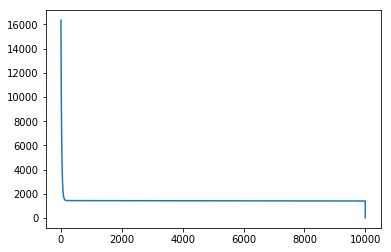

In [115]:
gradientDescent(X,Y,0.00001,10000) 